In [1]:
# importing dependencies here
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download("stopwords")

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import re
import time

import wget

# code formatter
%load_ext nb_black

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eshom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<IPython.core.display.Javascript object>

In [2]:
# validating the credentials
consumer_key = "XXXXX"
consumer_secret = "XXXXX"
access_token = "XXXXX"
access_token_secret = "XXXXX"

<IPython.core.display.Javascript object>

In [3]:
# creating the authentication object, setting access token and creating the api object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

<IPython.core.display.Javascript object>

In [4]:
# reading the last 50 tweets
tweets_list = []

username = "itsssr"
# username = "esharma_3"
tweet_count = 50
img_url = ""
screen_name = ""

# accessing last 50 tweets one at a time and adding them to a list
try:
    for tweet in api.user_timeline(
        id=username, count=tweet_count, tweet_mode="extended"
    ):
        tweets_dict = {}
        tweets_dict["date_created"] = tweet.created_at
        tweets_dict["tweet_id"] = tweet.id
        tweets_dict["tweet"] = tweet.full_text

        tweets_list.append(tweets_dict)

    #     tweets.append((tweet.created_at, tweet.id, tweet.text))
    screen_name = tweet.user.name
    print(screen_name)
    url = tweet.user.description
    print(url)
    img_url = tweet.user.profile_image_url
except BaseException as e:
    print("Failed to retrieve the tweet.", str(e))
    time.sleep(3)

Sushant Singh Rajput
Photon in a double-slit 💥


<IPython.core.display.Javascript object>

In [5]:
filename = wget.download(img_url)

100% [................................................................................] 2263 / 2263

<IPython.core.display.Javascript object>

In [6]:
# adding the retrieved tweet data into a dataframe
tweet_df = pd.DataFrame([tweet for tweet in tweets_list])

<IPython.core.display.Javascript object>

In [7]:
tweet_df.head()

,date_created,tweet_id,tweet
0,2019-12-27 17:05:44,1210607708312920065,Right from exploring the local tourist attract...
1,2019-12-11 11:30:18,1204725090690248704,"""Best wishes to all the retail employees for b..."
2,2019-11-19 09:01:57,1196715220502110209,Men have emotions too so don't be shy to cry. ...
3,2019-10-31 12:49:56,1189887224596189189,RT @Tarunmansukhani: Partners in crime and sty...
4,2019-10-28 04:35:03,1188675522978570241,Thank you so much @HTBrunch for making one of ...


<IPython.core.display.Javascript object>

### Preparing Tweets for Analysis

In [8]:
# cleaning

extra_stopwords = ["The", "It", "it"]

def prep_data(tweet):
    
    # cleaning the data   
#     tweet = tweet.lower()
    tweet = re.sub("https?:\/\/\S+", "", tweet) # replacing url with domain name
    tweet = re.sub("#[A-Za-z0–9]+", " ", tweet) # removing #mentions
    tweet = re.sub("#", " ", tweet) # removing hash tag 
    tweet = re.sub("\n", " ", tweet) # removing \n 
    tweet = re.sub("@[A-Za-z0–9]+", "", tweet) # removing @mentions
    tweet = re.sub("RT : ", "", tweet) # removing RT
    tweet = re.sub("\b[a-zA-Z]{1,2}\b", "", tweet) # removing 1-2 char long words
    tweet = re.sub('\w*\d\w*', "", tweet) # removing words containing digits
    
    for word in extra_stopwords:
        tweet = tweet.replace(word, "")

    # lemmitizing
    lemmatizer = WordNetLemmatizer()
    new_s = ""
    for word in tweet.split(" "):
        lemmatizer.lemmatize(word)
        if word not in stopwords.words("english"):
            new_s += word + " "

    return new_s[:-1]


<IPython.core.display.Javascript object>

In [9]:
tweet_df["clean_tweet"] = tweet_df["tweet"].apply(prep_data)

<IPython.core.display.Javascript object>

In [10]:
tweet_df.head()

,date_created,tweet_id,tweet,clean_tweet
0,2019-12-27 17:05:44,1210607708312920065,Right from exploring the local tourist attract...,Right exploring local tourist attractions expe...
1,2019-12-11 11:30:18,1204725090690248704,"""Best wishes to all the retail employees for b...","""Best wishes retail employees bringing smile c..."
2,2019-11-19 09:01:57,1196715220502110209,Men have emotions too so don't be shy to cry. ...,Men emotions shy cry. 's okay let hold insi...
3,2019-10-31 12:49:56,1189887224596189189,RT @Tarunmansukhani: Partners in crime and sty...,Partners crime style! coming screens TOMOR...
4,2019-10-28 04:35:03,1188675522978570241,Thank you so much @HTBrunch for making one of ...,Thank much making one cherished dreams come t...


<IPython.core.display.Javascript object>

In [11]:
tweet_df["clean_tweet"][0]

'Right exploring local tourist attractions experiencing culture closer lens,  perfect! And made  better get upto % cashback every-time I swiped       '

<IPython.core.display.Javascript object>

### Creating Word Cloud

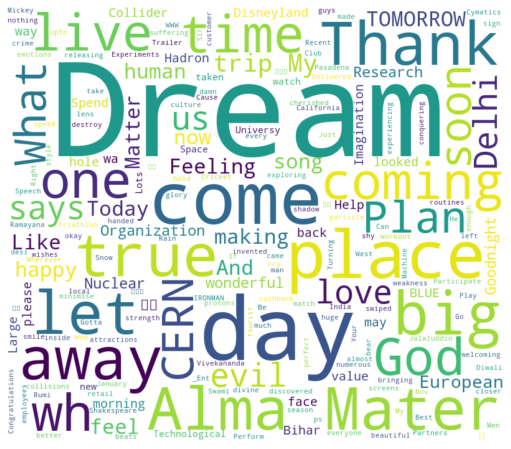

<IPython.core.display.Javascript object>

In [12]:
# creating word cloud based on tweets

wordcloud_words = " ".join(tweet_df["clean_tweet"])
wordcloud = WordCloud(
    height=700,
    width=800,
    background_color="white",
    random_state=100,
    stopwords=STOPWORDS,
).generate(wordcloud_words)
plt.figure(figsize=(10, 8), facecolor="white", edgecolor="blue")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Sentiment Scoring

In [13]:
# Create a function to get the polarity
def getPolarity(tweet):

    return TextBlob(tweet).sentiment.polarity


def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

<IPython.core.display.Javascript object>

In [14]:
tweet_df["polarity"] = tweet_df["clean_tweet"].apply(getPolarity)
tweet_df["analysis"] = tweet_df["polarity"].apply(getAnalysis)

<IPython.core.display.Javascript object>

In [15]:
tweet_df.head()

,date_created,tweet_id,tweet,clean_tweet,polarity,analysis
0,2019-12-27 17:05:44,1210607708312920065,Right from exploring the local tourist attract...,Right exploring local tourist attractions expe...,0.446429,Positive
1,2019-12-11 11:30:18,1204725090690248704,"""Best wishes to all the retail employees for b...","""Best wishes retail employees bringing smile c...",0.650000,Positive
2,2019-11-19 09:01:57,1196715220502110209,Men have emotions too so don't be shy to cry. ...,Men emotions shy cry. 's okay let hold insi...,0.000000,Neutral
3,2019-10-31 12:49:56,1189887224596189189,RT @Tarunmansukhani: Partners in crime and sty...,Partners crime style! coming screens TOMOR...,0.000000,Neutral
4,2019-10-28 04:35:03,1188675522978570241,Thank you so much @HTBrunch for making one of ...,Thank much making one cherished dreams come t...,0.537500,Positive


<IPython.core.display.Javascript object>

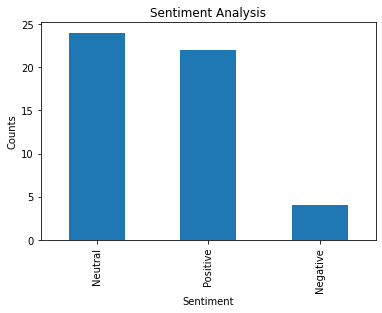

<IPython.core.display.Javascript object>

In [16]:
# Plotting and visualizing the counts
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
tweet_df["analysis"].value_counts().plot(kind="bar")
plt.show()

In [17]:
t = pd.DataFrame(tweet_df["analysis"].value_counts()).reset_index()
t

,index,analysis
0,Neutral,24
1,Positive,22
2,Negative,4


<IPython.core.display.Javascript object>

In [19]:
import plotly.graph_objects as go

def plot_sentiments():
    t = pd.DataFrame(tweet_df["analysis"].value_counts()).reset_index().rename(columns={"index": "sentiment"})
    print(t)
    fig = go.Figure([go.Bar(x=t["sentiment"], y=t["analysis"])])
    # st.bar_chart(t)
    fig.show()

senti_img=plot_sentiments()


  sentiment  analysis
0   Neutral        24
1  Positive        22
2  Negative         4


<IPython.core.display.Javascript object>